# 타이타닉 생존율 에측 모형을 위한 데이터 파악

In [3]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [4]:
import pandas as pd

titanic_url = 'https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic = pd.read_excel(titanic_url, sheet_name = 'total')
titanic_df = titanic.drop(['body', 'home.dest'], axis = 1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


## 연령별 생존율 파악하기

In [25]:
titanic_df['age_cat'] = pd.cut(titanic_df['age'], 
                               bins=[0, 3, 7, 15, 30, 60, 100], 
                               include_lowest=True, 
                               labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])

# observed = False , numeric_only = True 추가
titanic_df.groupby('age_cat', observed = False).mean(numeric_only = True)

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309


In [26]:
!pip install seaborn

In [27]:
!pip install matplotlib

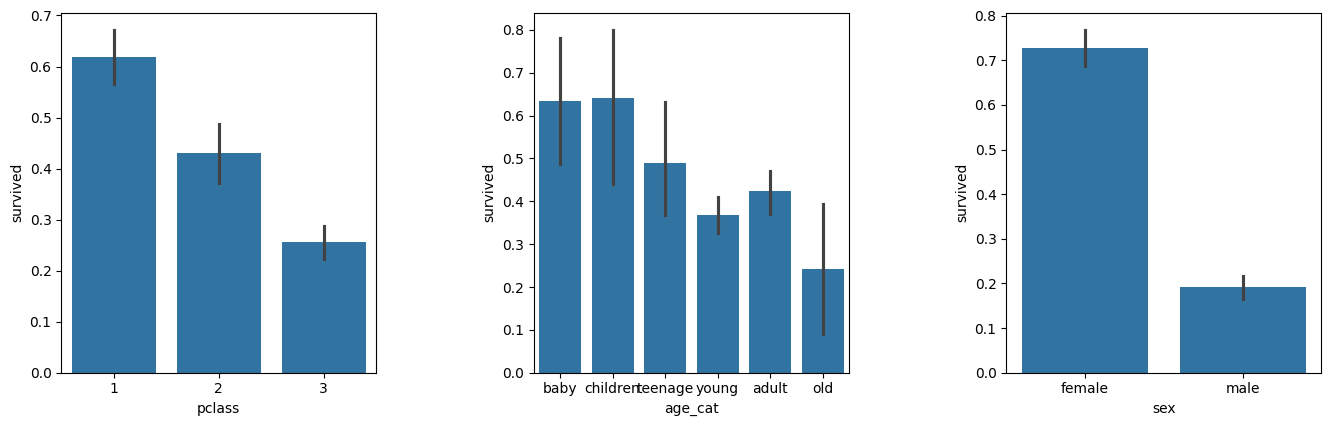

In [28]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

data = titanic_df
plt.figure(figsize = [14, 4])
plt.subplot(131)
sns.barplot(x = 'pclass', y = 'survived', data = titanic_df)

plt.subplot(132)
sns.barplot(x = 'age_cat', y = 'survived', data = titanic_df)

plt.subplot(133)
sns.barplot(x = 'sex', y = 'survived', data = titanic_df)

plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.10, right = 1, hspace = 0.5, wspace = 0.5)
plt.show()

In [30]:
titanic_df.groupby(['pclass', 'sex']).mean(numeric_only = True)

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

## 보트 탐승 승객의 생존율 파악하기

In [ ]:
boat_survivors = titanic_df[titanic_df['boat'].notnull()]
nboat_survivors = titanic_df[titanic_df['boat'].isnull()]
